# Exploratory Data Analysis - Varun Balle Demand Forecasting

# Importing necessary libraries

In [1]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from datetime import datetime, timedelta
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
%matplotlib inline
random.seed(42)

## Acknowledgements

The dataset provided by https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy

## Content

The dataset contains of ~ 7M rows and 24 columns. The columns are:
1. invoiceanditemnumber: concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order. 
2. date: date of order. 
3. storenumber: unique number assigned to the store who ordered the liquor.
4. storename: name of store who ordered the liquor. 
5. address: address of store who ordered the liquor. 
6. city: city where the store who ordered the liquor is located. 
7. zipcode: zip code where the store who ordered the liquor is located.
8. storelocation: location of store who ordered the liquor. The address, city, state and zip code are geocoded to provide geographic coordinates.
9. countynumber: iowa county number for the county where store who ordered the liquor is located.
10. county: county where the store who ordered the liquor is located.
11. category: category code associated with the liquor ordered.
12. categoryname: category of the liquor ordered. 
13. vendornumber: the vendor number of the company for the brand of liquor ordered.
14. vendorname: the vendor name of the company for the brand of liquor ordered. 
15. itemnumber: item number for the individual liquor product ordered.
16. itemdescription: description of the individual liquor product ordered. 
17. pack: the number of bottles in a case for the liquor ordered.
18. bottlevolumeml: volume of each liquor bottle ordered in milliliters.
19. statebottlecost: the amount that alcoholic beverages division paid for each bottle of liquor ordered. 
20. statebottleretail: the amount the store paid for each bottle of liquor ordered. 
21. bottlessold: the number of bottles of liquor ordered by the store.
22. saledollars: total cost of liquor order (number of bottles multiplied by the state bottle retail). 
23. volumesoldliters: total volume of liquor ordered in liters. (i.e. (bottle volume (ml) x bottles sold)/1,000). 
24. volumesold_gallons: total volume of liquor ordered in gallons. (i.e. (bottle volume (ml) x bottles sold)/3785.411784).

# Loading Dataset

In [2]:
df_2019 = pd.read_csv("2019_Iowa_Liquor_Sales.csv")
df_2020 = pd.read_csv("2020_Iowa_Liquor_Sales.csv")
df_2021 = pd.read_csv("2021_Iowa_Liquor_Sales.csv")

In [3]:
df = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

In [4]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-16690300025,01/02/2019,4449,KUM & GO #121 / URBANDALE,12041 DOUGLAS PKWY,URBANDALE,50322.0,NaN,77.0,POLK,...,37991,SMIRNOFF 80PRF MINI,12,500,7.47,11.21,2,22.42,1.0,0.26
1,INV-16677600011,01/02/2019,2478,PRAIRIE MEADOWS,ONE PRAIRIE MEADOWS DRIVE,ALTOONA,50009.0,NaN,77.0,POLK,...,44217,BARTON RUM LIGHT,12,1000,4.00,6.00,24,144.00,24.0,6.34
2,INV-16702300003,01/02/2019,3705,LIQUOR LOCKER,507 1ST AVE #100,ROCK RAPIDS,51246.0,NaN,60.0,LYON,...,11777,BLACK VELVET,12,1000,6.63,9.95,12,119.40,12.0,3.17
3,INV-16693100018,01/02/2019,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,IDA,...,35918,FIVE O'CLOCK VODKA,6,1750,7.20,10.80,6,64.80,10.5,2.77
4,INV-16685400057,01/02/2019,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001.0,NaN,31.0,DUBUQUE,...,46351,HAWKEYE LIGHT RUM,12,1000,4.34,6.51,12,78.12,12.0,3.17


In [5]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [6]:
# Define a dictionary mapping old names to lowercase new names
new_names = {
    'Invoice/Item Number': 'invoice_item_number',
    'Date': 'date',
    'Store Number': 'store_number',
    'Store Name': 'store_name',
    'Address': 'store_address',
    'City': 'city',
    'Zip Code': 'zip_code',
    'Store Location': 'store_location',
    'County Number': 'county_number',
    'County': 'county',
    'Category': 'category',
    'Category Name': 'category_name',
    'Vendor Number': 'vendor_number',
    'Vendor Name': 'vendor_name',
    'Item Number': 'item_number',
    'Item Description': 'item_description',
    'Pack': 'pack',
    'Bottle Volume (ml)': 'bottle_volume_ml',
    'State Bottle Cost': 'state_bottle_cost',
    'State Bottle Retail': 'state_bottle_retail',
    'Bottles Sold': 'bottles_sold',
    'Sale (Dollars)': 'sale_dollars',
    'Volume Sold (Liters)': 'volume_sold_liters',
    'Volume Sold (Gallons)': 'volume_sold_gallons'
}

# Convert values in the dictionary to lowercase for all new names
for key, value in new_names.items():
    new_names[key] = value.lower()

# Rename columns using the dictionary
df = df.rename(columns=new_names)

In [7]:
df.columns

Index(['invoice_item_number', 'date', 'store_number', 'store_name',
       'store_address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617422 entries, 0 to 7617421
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   invoice_item_number  object 
 1   date                 object 
 2   store_number         int64  
 3   store_name           object 
 4   store_address        object 
 5   city                 object 
 6   zip_code             float64
 7   store_location       object 
 8   county_number        float64
 9   county               object 
 10  category             float64
 11  category_name        object 
 12  vendor_number        float64
 13  vendor_name          object 
 14  item_number          int64  
 15  item_description     object 
 16  pack                 int64  
 17  bottle_volume_ml     int64  
 18  state_bottle_cost    float64
 19  state_bottle_retail  float64
 20  bottles_sold         int64  
 21  sale_dollars         float64
 22  volume_sold_liters   float64
 23  volume_sold_gallons  float64
dty

In [9]:
# transforming date column values to datetime object.
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617422 entries, 0 to 7617421
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   invoice_item_number  object        
 1   date                 datetime64[ns]
 2   store_number         int64         
 3   store_name           object        
 4   store_address        object        
 5   city                 object        
 6   zip_code             float64       
 7   store_location       object        
 8   county_number        float64       
 9   county               object        
 10  category             float64       
 11  category_name        object        
 12  vendor_number        float64       
 13  vendor_name          object        
 14  item_number          int64         
 15  item_description     object        
 16  pack                 int64         
 17  bottle_volume_ml     int64         
 18  state_bottle_cost    float64       
 19  state_bottle_retail  

In [ ]:
df.to_csv('Iowa Liquor Sales 2019-2021.csv')

# 1.Overall Sales Trends
This section investigates the overall sales trends in your liquor sales data from 2019 to 2021.

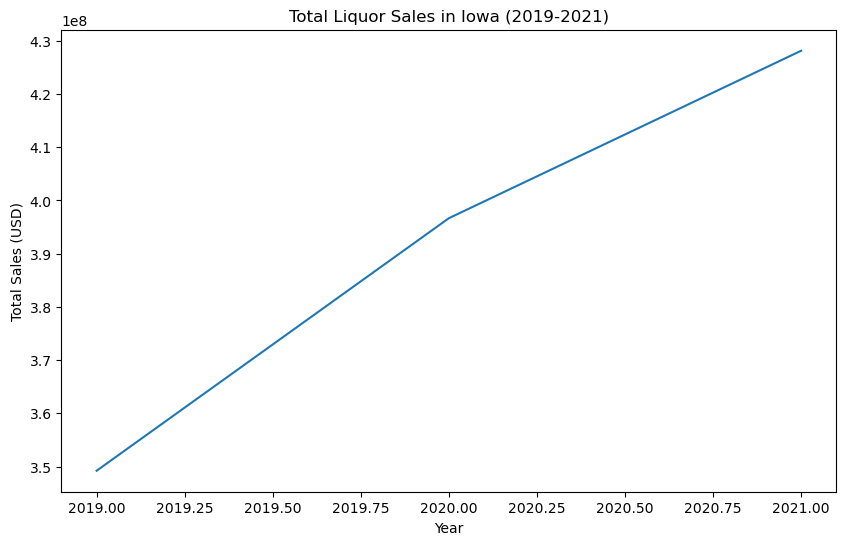

In [13]:
# Assuming "date" is a datetime format
df['Year'] = pd.to_datetime(df['date']).dt.year

# Total Sales by Year
yearly_sales = df.groupby('Year')['sale_dollars'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['sale_dollars'])
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.title('Total Liquor Sales in Iowa (2019-2021)')
plt.show()

## Insights:
-
By analyzing the line plot, you can identify patterns in sales ovetime therere is an evident n upward tretyAn upward trenthat d signifies that the liquor sales business is potentially growing and generating more revenue over tim Growth from 2019-2020 was pretty linear where ass it took a sudden bump in 2020 this could be accredited to the COVID-19 pandemic which hindered buyers' ability to purchase and steady incline was seen from 2020 to 2021 s.

# 2 Product and Category Analysis:

### Top Selling Items by Bottles

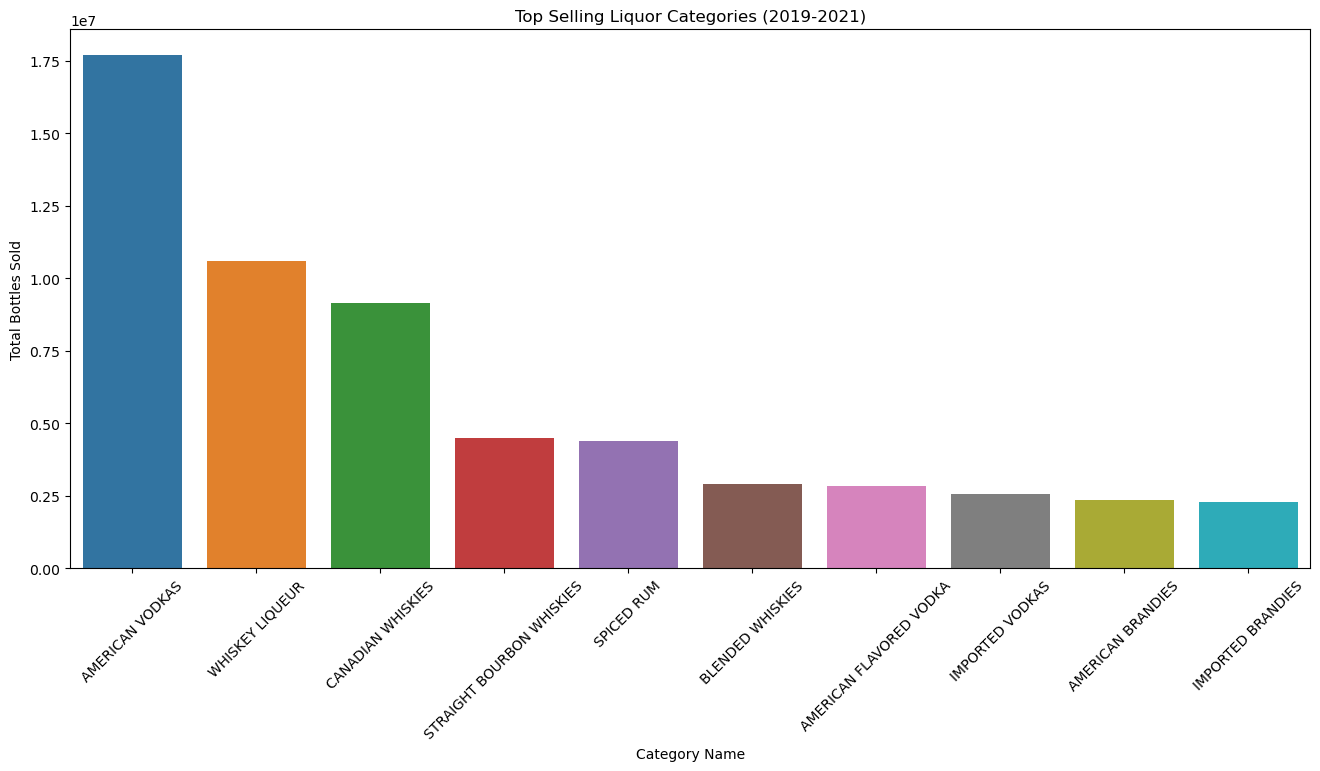

In [15]:
# Top Selling Categories by Bottles Sold
top_categories_sold = df.groupby('category_name')['bottles_sold'].sum().nlargest(10).reset_index()
plt.figure(figsize=(16, 7))
sns.barplot(x='category_name', y='bottles_sold', data=top_categories_sold)
plt.xlabel('Category Name')
plt.ylabel('Total Bottles Sold')
plt.title('Top Selling Liquor Categories (2019-2021)')
plt.xticks(rotation=45)
plt.show()

## Insights
-
From the plot, we can see that American Vodkas were the best selling category with Whiskey Liqueur and Canadian Whiskey Coming in second and third place

### Top Selling Items by Sales

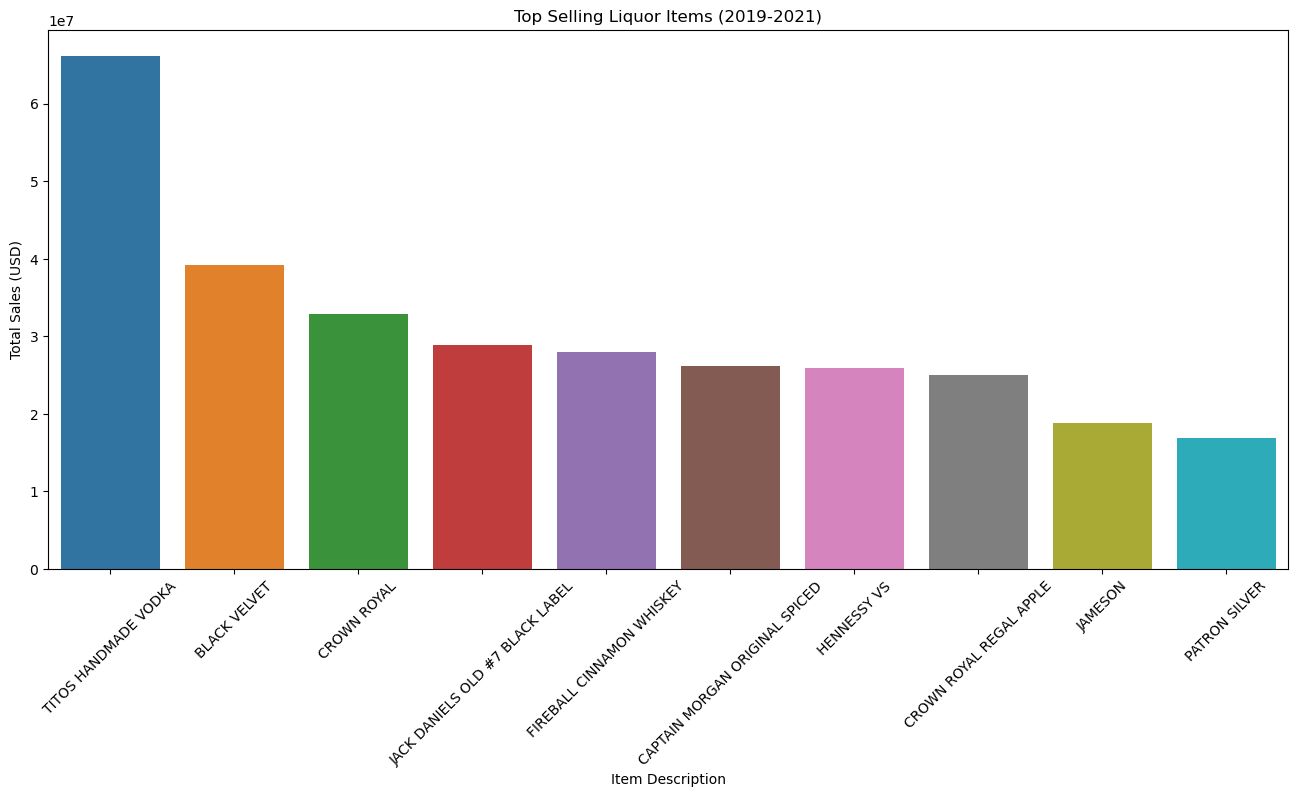

In [18]:
# Top-Selling Items by Sales Dollars
top_items_sales = df.groupby('item_description')['sale_dollars'].sum().nlargest(10).reset_index()
plt.figure(figsize=(16, 7))
sns.barplot(x='item_description', y='sale_dollars', data=top_items_sales)
plt.xlabel('Item Description')
plt.ylabel('Total Sales (USD)')
plt.title('Top Selling Liquor Items (2019-2021)')
plt.xticks(rotation=45)
plt.show()

## Insights
-
From the plot, we can see that Titos Vodkas were the best-selling category with Black Velvet and Crown Royal coming in second and third place

# 3. Trend of the number of bottles sold between 2019 to 2021?

Text(0.5, 1.0, 'Average bottles sold per month')

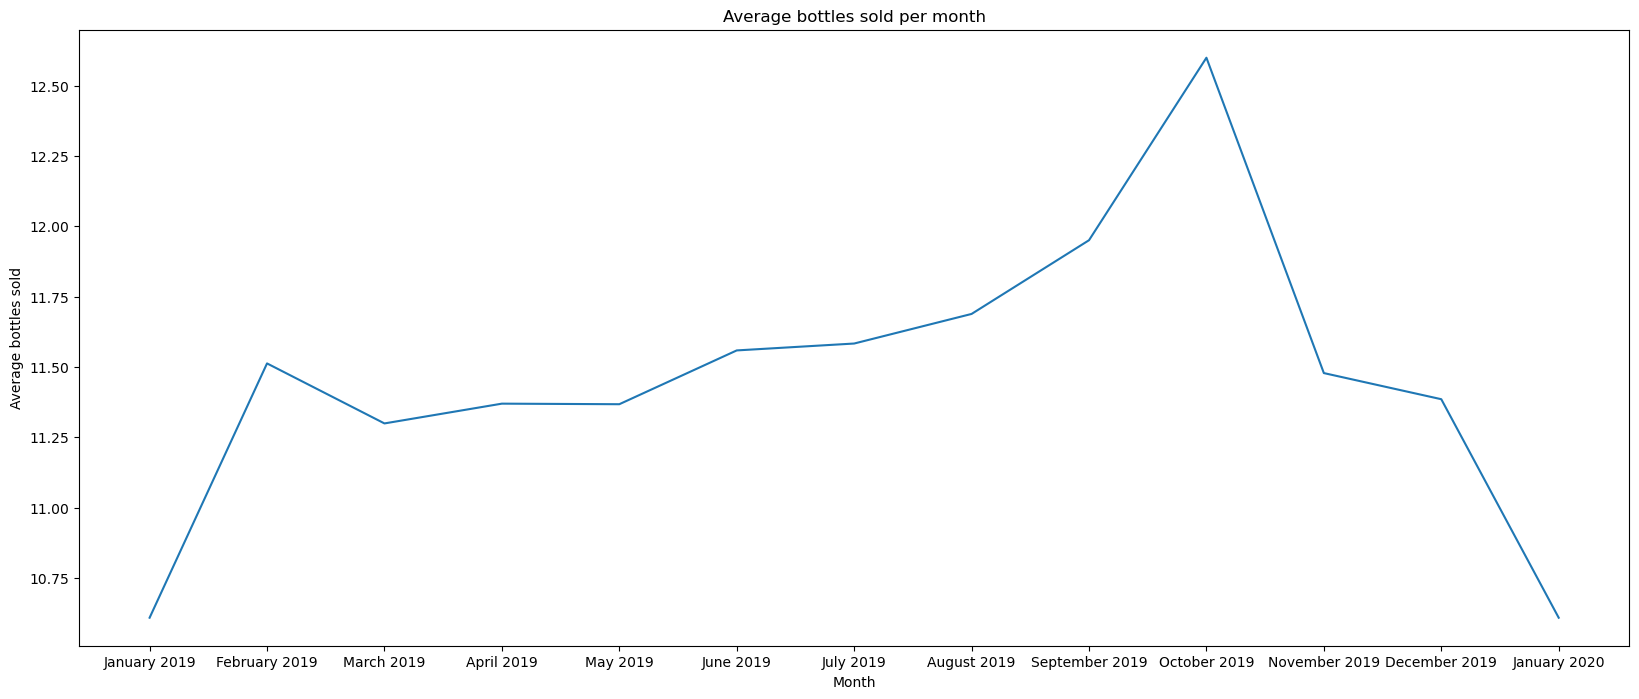

In [19]:
month = np.append(np.arange(1,13,1), 1, axis=None)
year = np.append(np.array([2019]*12), 2020, axis = None)
months = ["","January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mean_sale = []
sale_month = []


for i in range(13):
    mask_date = (df['date'].dt.month == pd.to_datetime(str(f"{year[i]}-{month[i]}")).month)
    mean_bottles_sale = df[mask_date]['bottles_sold'].mean()
    mean_sale.append(mean_bottles_sale)
    sale_month.append(str(f"{months[month[i]]} {year[i]}"))
plt.figure(figsize=(20,8))    
plt.plot(sale_month, mean_sale)  
plt.xlabel("Month")
plt.ylabel("Average bottles sold")
plt.title("Average bottles sold per month")

## Insights
-
Considering the specific dates from January 2019 to January 2020 we can see a rise in sales numbers around holiday seasons such as Christmas and New years

In [55]:
df[mask][['date','bottles_sold','city']]

,date,bottles_sold,city
4219599,2020-09-18,7920,DAVENPORT
4224191,2020-09-18,7920,DUBUQUE
4243191,2020-09-22,7920,SIOUX CITY
4262294,2020-09-23,7920,COUNCIL BLUFFS
4262407,2020-09-23,7632,AMES
4363708,2020-10-08,13200,DES MOINES
5736471,2021-04-19,13200,DES MOINES
6307705,2021-07-05,13200,DES MOINES
6943423,2021-10-04,11880,DES MOINES


# 4. Revenue being drawn

In [57]:
df['month'] = df['date'].dt.to_period('M')
sales_per_month = df.groupby(['month'])['sale_dollars'].sum()

Text(0, 0.5, 'Sales Price (in Millions)')

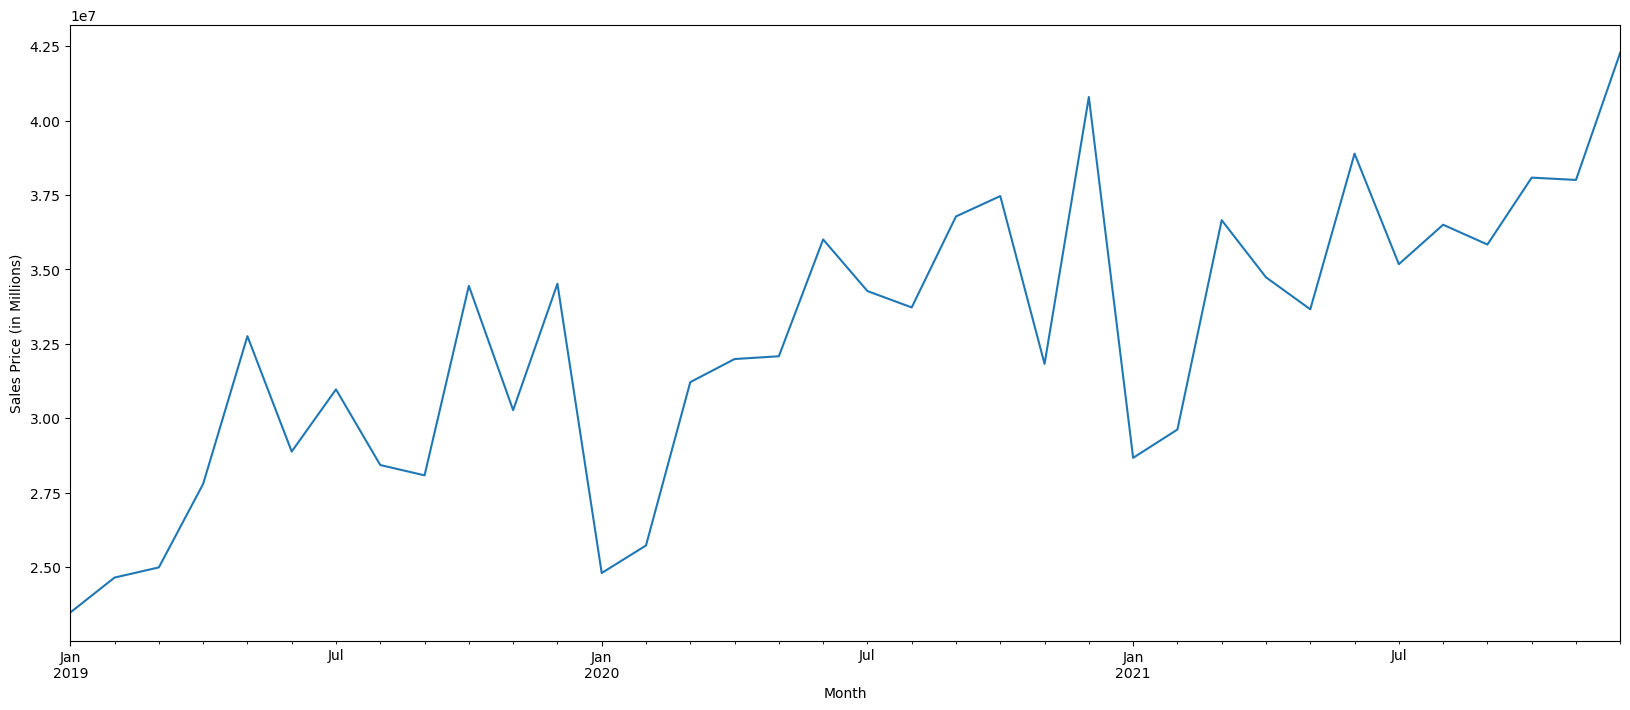

In [58]:
plt.figure(figsize=(20,8))
sales_per_month.plot()
plt.xlabel("Month")
plt.ylabel("Sales Price (in Millions)")

In [56]:
revenue_per_category = df.groupby('category_name')['sale_dollars'].sum()
revenue_per_category = revenue_per_category.sort_values(ascending = False)
print(f"The product with the most revenue is {revenue_per_category.index[0]} with a total revenue of {revenue_per_category[0].astype(int)} USD")

The product with the most revenue is AMERICAN VODKAS with a total revenue of 171330323 USD


C:\Users\Varun\AppData\Local\Temp\ipykernel_22520\2211366032.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The product with the most revenue is {revenue_per_category.index[0]} with a total revenue of {revenue_per_category[0].astype(int)} USD")


# 5. Stores and orders

In [62]:
stores_with_most_order = df.groupby('store_name').size().reset_index().rename(columns={0:"Number of orders"}).sort_values(by="Number of orders", ascending=False)
stores_with_most_order

,store_name,Number of orders
1062,HY-VEE #3 / BDI / DES MOINES,53974
682,CENTRAL CITY 2,49595
683,"CENTRAL CITY LIQUOR, INC.",48736
1165,HY-VEE FOOD STORE / CEDAR FALLS,44968
1229,HY-VEE WINE AND SPIRITS / BETTENDORF,39336
...,...,...
35,ARTISAN GRAIN DISTILLERY,6
1259,IOWA LEGENDARY RYE,4
1935,TYCOGA VINEYARD & WINERY,3
1611,PARADISE DISTILLING COMPANY,2


In [61]:
print(f"{df['store_name'].nunique()} different stores ordered the liquor.")
print(f"The store with the most number of order is {stores_with_most_order.iloc[0]['store_name']} with a total order of {stores_with_most_order.iloc[0]['Number of orders']}.")

2145 different stores ordered the liquor.
The store with the most number of order is HY-VEE #3 / BDI / DES MOINES with a total order of 53974.


# 6. Seasonality analysis

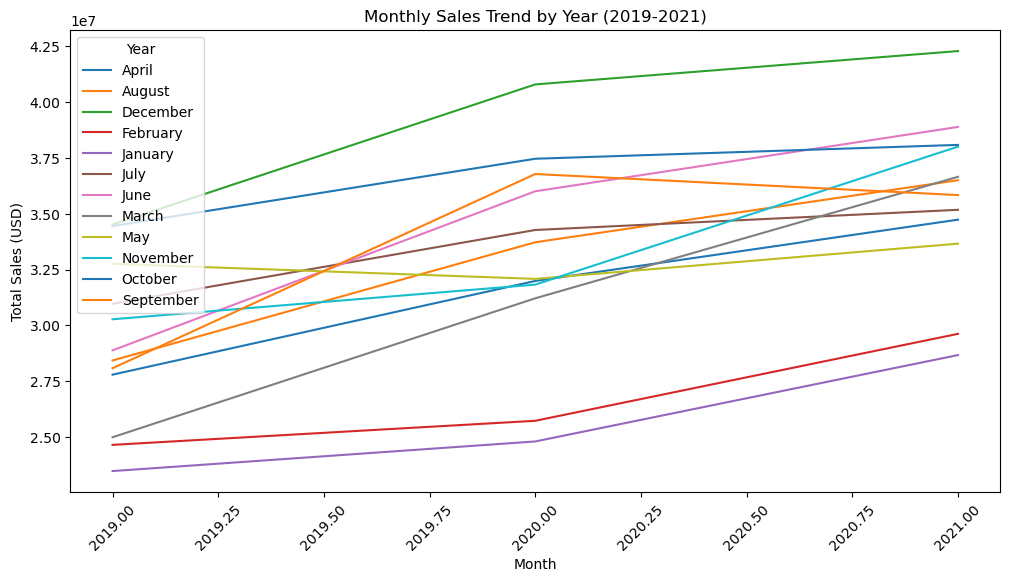

In [21]:
df['Month'] = pd.to_datetime(df['date']).dt.month_name()

monthly_sales = df.groupby(['Year', 'Month'])['sale_dollars'].sum().unstack()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Sales Trend by Year (2019-2021)')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


## Weekly Breakdown

Correlation between bottles sold and day of week: -0.00571037477624966


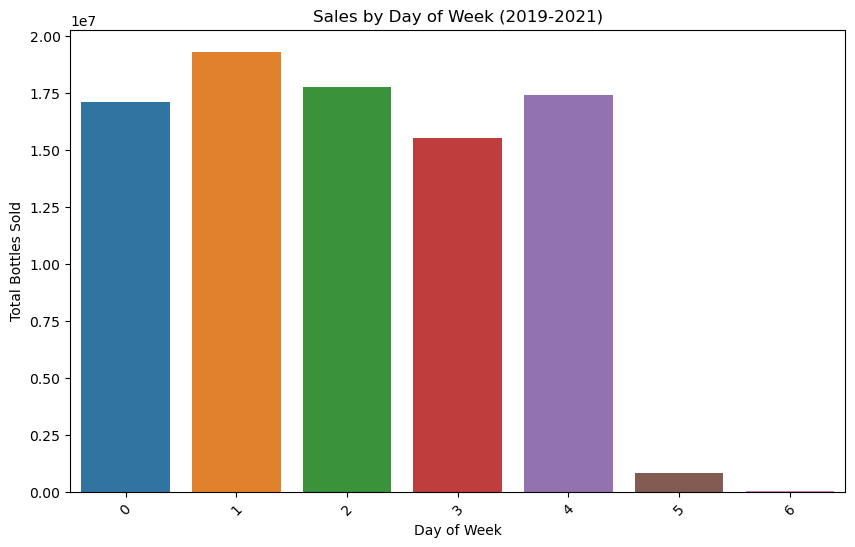

In [22]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek  # Extract day of week


correlation_day_week = df['bottles_sold'].corr(df['day_of_week'])
print("Correlation between bottles sold and day of week:", correlation_day_week)

day_of_week_sales = df.groupby('day_of_week')['bottles_sold'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='bottles_sold', data=day_of_week_sales)
plt.xlabel('Day of Week')  # 0: Monday, 6: Sunday
plt.ylabel('Total Bottles Sold')
plt.title('Sales by Day of Week (2019-2021)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [26]:
holidays_dict = {
    "2019-01-01": "New Year's Day",
    "2019-11-28": "Thanksgiving",
    "2019-12-25": "Christmas Day",
    "2020-01-01": "New Year's Day",
    "2020-11-28": "Thanksgiving",
    "2020-12-25": "Christmas Day",
    "2021-01-01": "New Year's Day",
    "2021-11-28": "Thanksgiving",
    "2021-12-25": "Christmas Day",
}
def is_holiday(date_str):
  return date_str in holidays_dict

In [27]:
df['holiday'] = df['date'].apply(lambda x: is_holiday(x.strftime("%Y-%m-%d")))

In [28]:
# Assuming 'date' is a datetime format
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
df['weekday'] = pd.to_datetime(df['date']).dt.weekday

# Example: Check for specific holidays based on month and day
def is_holiday(month, day):
  if month == 12 and day == 25:  # Christmas (adjust conditions for other holidays)
    return True
  return False

df['holiday'] = df.apply(lambda row: is_holiday(row['month'], row['day']), axis=1)


In [23]:
# Holiday Analysis (if 'holiday' column exists)
if 'holiday' in df.columns:
  # Calculate correlation between bottles sold and holiday (holiday = 1)
  correlation_holiday = df['bottles_sold'].corr(df['holiday'])
  print("Correlation between bottles sold and holiday:", correlation_holiday)

  # Group and visualize sales by holiday vs non-holiday
  holiday_sales = df.groupby('holiday')['bottles_sold'].sum().reset_index()
  plt.figure(figsize=(8, 6))
  sns.barplot(x='holiday', y='bottles_sold', data=holiday_sales)
  plt.xlabel('Holiday')
  plt.ylabel('Total Bottles Sold')
  plt.title('Sales on Holidays vs Non-Holidays (2019-2021)')
  plt.xticks(rotation=0)  # Display holiday labels horizontally (if applicable)
  plt.show()

## Monthly Breakdown

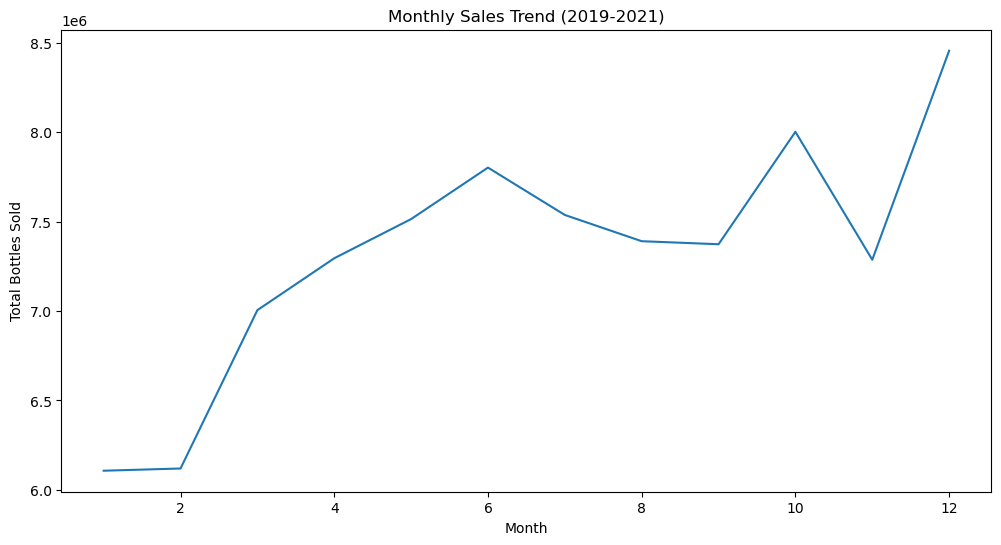

In [24]:
# Seasonality Analysis (Monthly Breakdown)
df['month'] = pd.to_datetime(df['date']).dt.month  # Extract month

monthly_sales = df.groupby('month')['bottles_sold'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['bottles_sold'])
plt.xlabel('Month')
plt.ylabel('Total Bottles Sold')
plt.title('Monthly Sales Trend (2019-2021)')
plt.show()

# 7. Holiday Impact Analysis

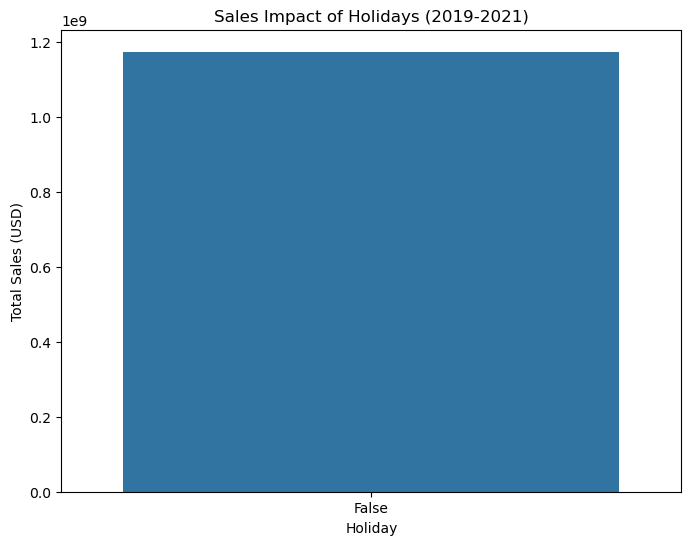

In [84]:
# Assuming a new binary feature "holiday" is created (0 - non-holiday, 1 - holiday)
holiday_sales = df.groupby('holiday')['sale_dollars'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='sale_dollars', data=holiday_sales)
plt.xlabel('Holiday')
plt.ylabel('Total Sales (USD)')
plt.title('Sales Impact of Holidays (2019-2021)')
plt.xticks(rotation=0)  # Display holiday labels horizontally
plt.show()

# 8. Consumption-based on Season

<Axes: xlabel='date'>

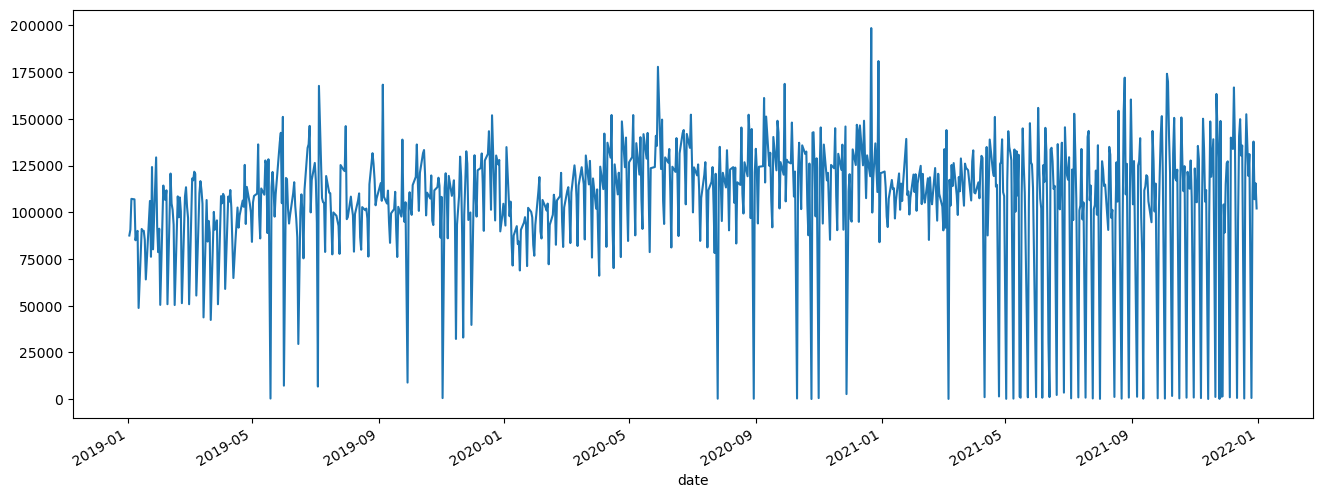

In [63]:
bottles_sold_per_day = df.groupby(['date'])['bottles_sold'].sum()
bottles_sold_per_day.plot(figsize=(16,6))

## The Augmented Dickey-Fuller (ADF) Test:
* The ADF test is a statistical test used to determine whether a time series is stationary.
* A time series is considered stationary if its mean, variance, and autocorrelation (dependence on past values) are constant over time.
* Stationarity is a crucial assumption for many time series forecasting models, including SARIMA.

In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [66]:
adf_test(bottles_sold_per_day)

ADF Statistics: -4.429351616290164
p- value: 0.00026327228982911513
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


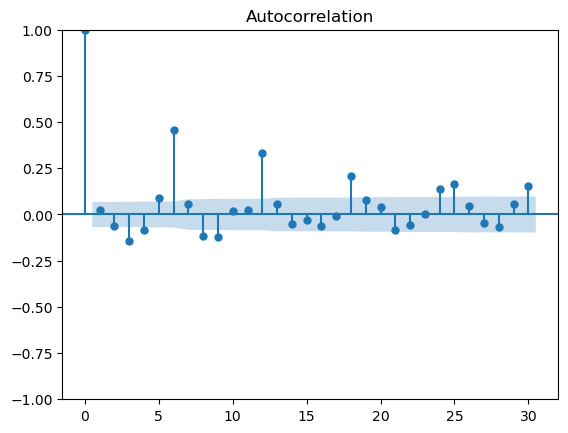

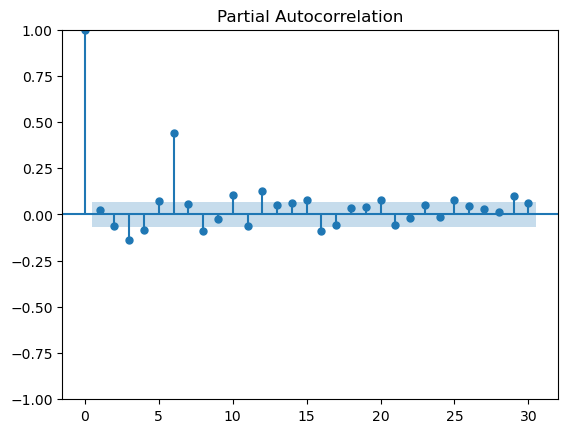

In [67]:
acf = plot_acf(bottles_sold_per_day)
pacf = plot_pacf(bottles_sold_per_day)

## Insghts
* Since the p-value (0.00026327) is less than 0.05, we can reject the null hypothesis. This means that there's strong evidence that the bottles_sold_per_day data has no unit root and is therefore stationary.